In [1]:
import pandas as pd
from sklearn import decomposition as dk
import numpy as np

In [2]:
df = pd.read_csv('matrix.csv')
df

,Unnamed: 0,rs181197193,rs186834002,rs144093713,rs147674709,rs188866174,rs138213065,rs190256453,rs115269791,rs143200904,...,rs140124789,rs77039999,rs148748732,rs112599809,rs1533309,rs148275814,rs182615206,rs11854581,rs184861377,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,GBR
1,HG00097,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,2,GBR
2,HG00099,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,2,GBR
3,HG00100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,2,2,GBR
4,HG00101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,2,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,2,2,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,1,1,TSI


In [3]:
df.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True)
df

,Sample,rs181197193,rs186834002,rs144093713,rs147674709,rs188866174,rs138213065,rs190256453,rs115269791,rs143200904,...,rs140124789,rs77039999,rs148748732,rs112599809,rs1533309,rs148275814,rs182615206,rs11854581,rs184861377,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,GBR
1,HG00097,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,2,GBR
2,HG00099,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,2,GBR
3,HG00100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,2,2,GBR
4,HG00101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,2,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,2,2,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,1,1,TSI


In [4]:
non_snp_columns = ['Population code', 'Sample']

In [5]:
df_snps = df.drop(non_snp_columns, axis=1) # axis=1 --> drop columns; axis=2 --> drop rows
matrix = df_snps.to_numpy()
print(matrix.shape)
matrix

(1092, 11305)


array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 2],
       [0, 0, 0, ..., 0, 0, 2],
       ...,
       [0, 0, 0, ..., 0, 2, 2],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [6]:
pca = dk.PCA(n_components=2)
pca.fit(matrix)
print(pca)

PCA(n_components=2)


In [7]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

# as I go from first to the last principal component of our pca, how much varianco of the original data I can explain

[0.08308617 0.06451874]
[275.69820371 242.94754276]


In [8]:
to_plot = pca.transform(matrix)
to_plot.shape

(1092, 2)

In [9]:
import matplotlib.pyplot as plt

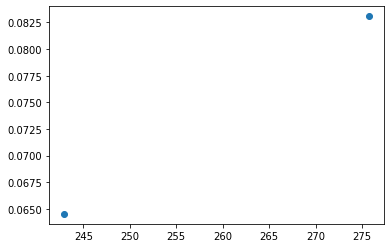

In [10]:
plt.scatter(x = pca.singular_values_, y = pca.explained_variance_ratio_)

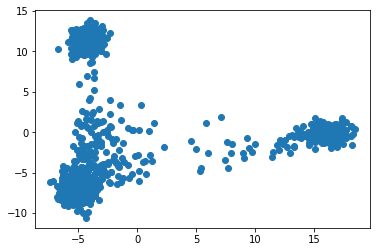

In [11]:
plt.scatter(x=to_plot[:, 0], y=to_plot[:, 1])

In [12]:
import altair as alt

In [13]:
df_plot = df[non_snp_columns].copy()
df_plot

,Population code,Sample
0,GBR,HG00096
1,GBR,HG00097
2,GBR,HG00099
3,GBR,HG00100
4,GBR,HG00101
...,...,...
1087,TSI,NA20816
1088,TSI,NA20818
1089,TSI,NA20819
1090,TSI,NA20826


In [14]:
df_plot['PC1'] = to_plot[:, 0]
df_plot['PC2'] = to_plot[:, 1]
df_plot

,Population code,Sample,PC1,PC2
0,GBR,HG00096,-5.682056,-6.781766
1,GBR,HG00097,-4.860171,-7.317257
2,GBR,HG00099,-5.243386,-7.997362
3,GBR,HG00100,-3.818483,-8.058980
4,GBR,HG00101,-3.939446,-5.965457
...,...,...,...,...
1087,TSI,NA20816,-4.655376,-7.020257
1088,TSI,NA20818,-4.691312,-7.857997
1089,TSI,NA20819,-5.327057,-8.747082
1090,TSI,NA20826,-4.686688,-7.730064


In [15]:
alt.Chart(df_plot).mark_circle().encode(
    x = 'PC1',
    y = 'PC2',
    color = alt.Color('Population code', scale = alt.Scale(scheme='turbo'))
)

alt.Chart(...)

In [16]:
pop = pd.read_csv('igsr_populations.tsv', sep = '\t')
pop

,Population code,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,FIN,FIN,Finnish,Finnish in Finland,60.17000,24.930000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,CHS,CHS,Southern Han Chinese,Han Chinese South,23.13333,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,KHV,KHV,Kinh Vietnamese,"Kinh in Ho Chi Minh City, Vietnam",10.78000,106.680000,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,BEB,BEB,Bengali,Bengali in Bangladesh,23.70000,90.350000,SAS,South Asian Ancestry,#c44cfd,5,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,PUR,PUR,Puerto Rican,Puerto Rican in Puerto Rico,18.40000,-66.100000,AMR,American Ancestry,#710027,2,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...
207,NaN,KinhSGDP,Kinh,Kinh in Vietnam (SGDP),21.00000,105.900000,NaN,East Asia (SGDP),#ff48de,16,Simons Genome Diversity Project
208,NaN,IranianSGDP,Iranian,Iranian in Iran (SGDP),35.60000,51.500000,NaN,West Eurasia (SGDP),#001f54,19,Simons Genome Diversity Project
209,NaN,ItelmanSGDP,Itelman,Itelman in Russia (SGDP),57.00000,157.000000,NaN,Central Asia and Siberia (SGDP),#01daa0,15,Simons Genome Diversity Project
210,NaN,EsanSGDP,Esan,Esan in Nigeria (SGDP),6.50000,6.000000,NaN,Africa (SGDP),#12eeff,13,Simons Genome Diversity Project


In [17]:
df_plot = df_plot.merge(pop, on='Population code', how='inner')
df_plot

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,GBR,HG00096,-5.682056,-6.781766,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,GBR,HG00097,-4.860171,-7.317257,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,GBR,HG00099,-5.243386,-7.997362,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,GBR,HG00100,-3.818483,-8.058980,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,GBR,HG00101,-3.939446,-5.965457,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,TSI,NA20816,-4.655376,-7.020257,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1088,TSI,NA20818,-4.691312,-7.857997,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1089,TSI,NA20819,-5.327057,-8.747082,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1090,TSI,NA20826,-4.686688,-7.730064,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [18]:
# plotting by samples and not by snps
# plotting samples according to pca of their genotypes

# PC1 ima kombinacijo uteži, ki rezultira v 

colour_scale = ['red', 'blue', 'green', 'yellow']

alt.Chart(df_plot).mark_circle().configure(font='Times New Roman').configure_axis(labelFontSize = 16, titleFontSize = 16).configure_legend(labelFontSize = 16, titleFontSize = 16,  strokeColor='gray',
    fillColor='#F9F9F9',
    padding=10,
    cornerRadius=10,
    orient='right',
    labelOpacity = 0,
    titleOpacity = 0).encode(
    x = 'PC1',
    y = 'PC2',
    color = alt.Color('Superpopulation name', scale = alt.Scale(scheme='turbo'))
)

alt.Chart(...)

In [19]:
from sklearn.manifold import TSNE


In [20]:
x = matrix
x_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=100).fit_transform(x)
x_embedded.shape

c:\Users\anaku\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(1092, 2)

In [21]:
df_plot['tsne1'] = x_embedded[:, 0]
df_plot['tsne2'] = x_embedded[:, 1]
df_plot

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections,tsne1,tsne2
0,GBR,HG00096,-5.682056,-6.781766,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-2.319170,-8.957318
1,GBR,HG00097,-4.860171,-7.317257,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-4.641097,-8.755761
2,GBR,HG00099,-5.243386,-7.997362,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-2.696467,-8.489687
3,GBR,HG00100,-3.818483,-8.058980,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-2.202713,-8.981059
4,GBR,HG00101,-3.939446,-5.965457,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-3.187445,-5.336860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,TSI,NA20816,-4.655376,-7.020257,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-1.392074,-7.462998
1088,TSI,NA20818,-4.691312,-7.857997,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-2.334928,-7.582922
1089,TSI,NA20819,-5.327057,-8.747082,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-1.959370,-8.339137
1090,TSI,NA20826,-4.686688,-7.730064,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-2.671213,-7.491645


In [22]:
alt.Chart(df_plot).mark_circle().encode(
    x = 'tsne1',
    y = 'tsne2',
    color = alt.Color('Superpopulation name', scale = alt.Scale(scheme='turbo')) 
)

alt.Chart(...)

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [24]:
from shapely.geometry import Point
alt.renderers.enable('default') #Allows the map to be displayed in the notebook/Jupyterlab

RendererRegistry.enable('default')

In [25]:
countries = gpd.read_file(r'E:\Genomika\World\world-administrative-boundaries.shp')

In [26]:
countries

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,None,Adm. by EGY,EGY,Ma'tan al-Sarra,Africa,Northern Africa,None,Ma'tan al-Sarra,"POLYGON ((33.25104 21.99977, 34.15064 21.99603..."
1,CHE,Member State,CHE,Switzerland,Europe,Western Europe,CH,Suisse,"POLYGON ((9.56672 47.54045, 9.55980 47.50209, ..."
2,None,UK Territory,GBR,Jersey,Europe,Northern Europe,None,Jersey,"POLYGON ((-2.01500 49.21417, -2.02111 49.17721..."
3,AUT,Member State,AUT,Austria,Europe,Western Europe,AT,Autriche,"POLYGON ((16.94618 48.61907, 16.94333 48.57333..."
4,PRT,Member State,PRT,Portugal,Europe,Southern Europe,PT,Portugal,"POLYGON ((-7.43185 37.25319, -7.41903 37.18055..."
...,...,...,...,...,...,...,...,...,...
251,BDI,Member State,BDI,Burundi,Africa,Eastern Africa,BI,Burundi,"POLYGON ((30.57333 -2.39917, 30.52208 -2.46160..."
252,PHL,Member State,PHL,Philippines,Asia,South-Eastern Asia,PH,Philippines,"MULTIPOLYGON (((120.25360 5.23333, 120.22560 5..."
253,MDG,Member State,MDG,Madagascar,Africa,Eastern Africa,MG,Madagascar,"MULTIPOLYGON (((49.83361 -17.08973, 49.82722 -..."
254,AZE,Member State,AZE,Azerbaijan,Asia,Western Asia,AZ,AzerbaÃ¯djan,"MULTIPOLYGON (((46.17825 38.84115, 46.07471 38..."


In [27]:
import plotly.express as px


In [28]:
country_data = px.data.gapminder()
country_data.tail()


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298,ZWE,716


In [29]:
fig = px.scatter_geo(df_plot, lon = 'Population longitude', lat = 'Population latitude')
fig.show()

In [30]:
df_numbers = df_plot['Population elastic ID'].value_counts().rename_axis('Population elastic ID').reset_index(name='Number of test subjects')
print(df_numbers)


   Population elastic ID  Number of test subjects
0                    CHS                      100
1                    TSI                       98
2                    CHB                       97
3                    LWK                       97
4                    FIN                       93
5                    GBR                       89
6                    JPT                       89
7                    YRI                       88
8                    CEU                       85
9                    MXL                       66
10                   ASW                       61
11                   CLM                       60
12                   PUR                       55
13                   IBS                       14


In [31]:
df_location = df_numbers.merge(df_plot, on='Population elastic ID', how='inner')
df_location

,Population elastic ID,Number of test subjects,Population code,Sample,PC1,PC2,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections,tsne1,tsne2
0,CHS,100,CHS,HG00403,-4.379129,10.250433,Southern Han Chinese,Han Chinese South,23.13333,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-6.624595,12.702444
1,CHS,100,CHS,HG00404,-6.674776,10.272068,Southern Han Chinese,Han Chinese South,23.13333,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-4.827778,14.270481
2,CHS,100,CHS,HG00406,-3.338775,11.159883,Southern Han Chinese,Han Chinese South,23.13333,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-4.300522,14.345128
3,CHS,100,CHS,HG00407,-4.013550,10.649827,Southern Han Chinese,Han Chinese South,23.13333,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-4.740110,12.841611
4,CHS,100,CHS,HG00418,-4.243946,10.956294,Southern Han Chinese,Han Chinese South,23.13333,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-4.997751,14.164015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,IBS,14,IBS,HG01620,-3.997842,-6.959682,Iberian,Iberian populations in Spain,40.38000,-3.720000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-1.622317,-5.781664
1088,IBS,14,IBS,HG01623,-3.826585,-5.650550,Iberian,Iberian populations in Spain,40.38000,-3.720000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-0.680051,-7.869791
1089,IBS,14,IBS,HG01624,-4.853681,-5.806421,Iberian,Iberian populations in Spain,40.38000,-3.720000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-3.490629,-4.764258
1090,IBS,14,IBS,HG01625,-4.836795,-6.209230,Iberian,Iberian populations in Spain,40.38000,-3.720000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-2.848609,-5.829397


In [32]:
df_temp = df_location.drop_duplicates(subset=['Population elastic ID'])
df_temp

,Population elastic ID,Number of test subjects,Population code,Sample,PC1,PC2,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections,tsne1,tsne2
0,CHS,100,CHS,HG00403,-4.379129,10.250433,Southern Han Chinese,Han Chinese South,23.133330,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-6.624595,12.702444
100,TSI,98,TSI,NA20502,-5.423160,-6.136076,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-4.072325,-5.170431
198,CHB,97,CHB,NA18525,-3.647890,11.625761,Han Chinese,"Han Chinese in Beijing, China",39.916666,116.383333,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-5.624026,12.884809
295,LWK,97,LWK,NA19020,15.046482,-0.995993,Luhya,"Luhya in Webuye, Kenya",-1.270000,36.610000,AFR,African Ancestry,#ffd845,1,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",8.510239,-3.056313
392,FIN,93,FIN,HG00171,-5.857649,-5.372281,Finnish,Finnish in Finland,60.170000,24.930000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-3.959683,-5.434277
485,GBR,89,GBR,HG00096,-5.682056,-6.781766,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-2.319170,-8.957318
574,JPT,89,JPT,NA18939,-3.191093,10.675617,Japanese,"Japanese in Tokyo, Japan",35.680000,139.680000,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-4.738456,12.414613
663,YRI,88,YRI,NA18486,17.103396,0.071859,Yoruba,"Yoruba in Ibadan, Nigeria",7.400000,3.920000,AFR,African Ancestry,#ffd845,1,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",8.402253,-2.566680
751,CEU,85,CEU,NA06984,-5.851058,-7.692822,CEPH,Utah residents (CEPH) with Northern and Wester...,40.767000,-111.890400,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-4.403260,-9.049708
836,MXL,66,MXL,NA19648,-5.356267,-6.373559,Mexican Ancestry,"Mexican Ancestry in Los Angeles, California",34.054400,-118.243900,AMR,American Ancestry,#710027,2,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-2.526110,-5.532613


In [33]:
df_location = df_temp[["Population elastic ID", "Number of test subjects", "Population latitude", "Population longitude", "Superpopulation name"]]
df_location

,Population elastic ID,Number of test subjects,Population latitude,Population longitude,Superpopulation name
0,CHS,100,23.133330,113.266667,East Asian Ancestry
100,TSI,98,42.100000,12.000000,European Ancestry
198,CHB,97,39.916666,116.383333,East Asian Ancestry
295,LWK,97,-1.270000,36.610000,African Ancestry
392,FIN,93,60.170000,24.930000,European Ancestry
485,GBR,89,52.486243,-1.890401,European Ancestry
574,JPT,89,35.680000,139.680000,East Asian Ancestry
663,YRI,88,7.400000,3.920000,African Ancestry
751,CEU,85,40.767000,-111.890400,European Ancestry
836,MXL,66,34.054400,-118.243900,American Ancestry


In [34]:
fig = px.scatter_geo(df_location, lon = 'Population longitude', lat = 'Population latitude', size='Number of test subjects', color_discrete_sequence=['#af4ed1'], width = 1200, height = 600, title = 'Vzorci')
fig.update_layout(title_text='Lokacije odvzema vzorcev in njihove relativne velikosti', title_x=0.5, title_font_family="Times New Roman", title_font_size=24, title_font_color="black")
fig.show()

In [35]:
fig = px.scatter_geo(df_plot, lon = 'Population longitude', lat = 'Population latitude')
fig.show()